## Combine Weather Data

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

import datetime
import pytz

In [45]:
weather = pd.read_csv('rainfall_2017.csv')

In [46]:
#converting str to datetime and keeping the dates only
for index, row in weather.iterrows():
    weather.at[index,'timestamp'] = datetime.datetime.strptime(weather.timestamp[index],'%Y-%m-%dT%X%z')
    #weather.at[index,'timestamp'] = weather['timestamp'][index][0:10]
    

In [47]:
#inserting column - types of rainfall
weather.insert(6,"types of rainfall",'')

In [48]:
for index,row in weather.iterrows():
    value = 'No rain'
    if row['readings'] > 8:
        value = 'Very heavy rain'
    elif row['readings'] > 4:
        value = 'Heavy rain'
    elif row['readings'] > 0.5:
        value = 'Moderate rain'
    elif row['readings'] != 0 :
        value = 'Slight rain'
    else:
        value = 'No rain'
    weather.at[index,'types of rainfall'] = value

In [49]:
weather

,station_id,station_name,latitude,longitude,timestamp,readings,types of rainfall
0,S77,Alexandra Road,1.29370,103.81250,2017-01-01 00:04:59+08:00,0.0,No rain
1,S109,Ang Mo Kio Avenue 5,1.37640,103.84920,2017-01-01 00:04:59+08:00,0.0,No rain
2,S117,Banyan Road,1.25600,103.67900,2017-01-01 00:04:59+08:00,0.0,No rain
3,S55,Buangkok Green,1.38370,103.88600,2017-01-01 00:04:59+08:00,0.0,No rain
4,S64,Bukit Panjang Road,1.38240,103.76030,2017-01-01 00:04:59+08:00,0.0,No rain
...,...,...,...,...,...,...,...
112108,S08,Upper Thomson Road,1.37010,103.82710,2017-01-07 23:59:59+08:00,0.0,No rain
112109,S116,West Coast Highway,1.28100,103.75400,2017-01-07 23:59:59+08:00,0.0,No rain
112110,S104,Woodlands Avenue 9,1.44387,103.78538,2017-01-07 23:59:59+08:00,0.0,No rain
112111,S100,Woodlands Road,1.41720,103.74855,2017-01-07 23:59:59+08:00,0.0,No rain


In [50]:
list_of_location = weather.drop_duplicates(subset='station_name',ignore_index=True)

In [55]:
def match(lat,long,rad):
    test = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('universal studio since:2017-01-01 until:2017-01-08 geocode:"{},{},{}km"'.format(lat,long,rad)).get_items(), 50))
    return test

In [123]:
for x, row in list_of_location.iterrows():
    name = row['station_name']
    lat = row['latitude']
    long = row['longitude']
    df = match(lat,long,10)

    for index,rows in df.iterrows():
        utc_current = df.date[index]
        pst_current = utc_current.astimezone(pytz.timezone("Asia/Singapore"))
        df.at[index,'date'] = str(pst_current)
        df.at[index,'date'] = datetime.datetime.strptime(df.date[index],'%Y-%m-%d %X%z')
    
    df.insert(0,"Raining?",'')
    df_by_location = weather.loc[weather['station_name'] == name]
    for I,R in df.iterrows():
        result = ''
        current_date = df['date'][I]
        for i,r in df_by_location.iterrows():
            compare_date = r['timestamp']
            if abs(current_date-compare_date) <= datetime.timedelta(minutes=5):
                result = r['types of rainfall']
                break
        
        df.at[I,'Raining?'] = result

    if x == 0:
        final = df
    else: 
        final = final.append(df)

In [125]:
final = final.drop_duplicates(subset='content',ignore_index=True)

In [126]:
final

,Raining?,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,No rain,https://twitter.com/aurexiaa/status/8173979477...,2017-01-06 23:50:31+08:00,％ ー Promise me a place in your house of memori...,8.173979e+17,aurexiaa,[https://www.instagram.com/p/BO7bajbAzWj/],https://www.instagram.com/p/BO7bajbAzWj/,[https://t.co/WBa1TE6zeo],https://t.co/WBa1TE6zeo
1,No rain,https://twitter.com/the_hjm/status/81728211262...,2017-01-06 16:10:14+08:00,Team yellow #bumblebee #universalstudio #sheto...,8.172821e+17,the_hjm,[https://www.instagram.com/p/BO6mvPIgFLj/],https://www.instagram.com/p/BO6mvPIgFLj/,[https://t.co/w8e6XPiYBN],https://t.co/w8e6XPiYBN
2,No rain,https://twitter.com/joshuaxagatep/status/81722...,2017-01-06 12:09:47+08:00,Magu-upload na pala 'ko ng video mamayang gabi...,8.172216e+17,joshuaxagatep,[],,[],
3,No rain,https://twitter.com/IamGeeL/status/81690629488...,2017-01-05 15:16:52+08:00,Waterworld USS #version2.0 @ Water World Unive...,8.169063e+17,IamGeeL,[https://www.instagram.com/p/BO371QfDU8l/],https://www.instagram.com/p/BO371QfDU8l/,[https://t.co/FJwatL3EOF],https://t.co/FJwatL3EOF
4,No rain,https://twitter.com/jaicpn/status/816584302875...,2017-01-04 17:57:23+08:00,Far far away 🏰 @ Shrek 4D Adventure@Far Far Aw...,8.165843e+17,jaicpn,[https://www.instagram.com/p/BO1paPoBQ6Y/],https://www.instagram.com/p/BO1paPoBQ6Y/,[https://t.co/8oF2vuzuD6],https://t.co/8oF2vuzuD6
5,No rain,https://twitter.com/saesarina/status/816469649...,2017-01-04 10:21:48+08:00,"Gak pernah gak happy kalo maen ke tempat ini, ...",8.164696e+17,saesarina,[https://www.instagram.com/p/BO01RiXgNuO/],https://www.instagram.com/p/BO01RiXgNuO/,[https://t.co/L1i5TGxLzX],https://t.co/L1i5TGxLzX
6,No rain,https://twitter.com/IamGeeL/status/81629405964...,2017-01-03 22:44:04+08:00,Universal Studio Singapore🇸🇬 #version2.0 #newy...,8.162941e+17,IamGeeL,[https://www.instagram.com/p/BOzlbJJDbcl/],https://www.instagram.com/p/BOzlbJJDbcl/,[https://t.co/8En4CBhEyo],https://t.co/8En4CBhEyo
7,No rain,https://twitter.com/uny_eva/status/81598181939...,2017-01-03 02:03:20+08:00,Jln2 asiiikk...😍 (at Universal Studio Singapor...,8.159818e+17,uny_eva,[https://path.com/p/3T2DqM],https://path.com/p/3T2DqM,[https://t.co/9Emep1nnfw],https://t.co/9Emep1nnfw
8,No rain,https://twitter.com/uny_eva/status/81596406564...,2017-01-03 00:52:47+08:00,Alhamdulillah kumpul2 sama adik2...😙😍 (with Fe...,8.159641e+17,uny_eva,[https://path.com/p/1YGh4T],https://path.com/p/1YGh4T,[https://t.co/vCHE3ZuWoB],https://t.co/vCHE3ZuWoB
9,No rain,https://twitter.com/neiljay22/status/815954413...,2017-01-03 00:14:26+08:00,"My friend pica, pet dino, long lost brother os...",8.159544e+17,neiljay22,[https://www.instagram.com/p/BOxK-EgB093/],https://www.instagram.com/p/BOxK-EgB093/,[https://t.co/V1QF61hrgt],https://t.co/V1QF61hrgt


## Cleaning the data 

In [69]:
import pandas as pd
import numpy as np
import re
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import datetime
import emoji

def remove_emoji(text):
    emoji_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

def remove_hashtag_mentions_urls(text):
    return re.sub(r"(?:\@|\#|https?\://)\S+", "", text)

def stopwords_ls(additional_stopwords):
    stop_list = stopwords.words('english')
    for word in additional_stopwords:
        stop_list.append(word)
    
    return stop_list

def text_preprocessing(df, column_name, stopword_list):
    output = []
    for text in df[column_name]:
        text = remove_hashtag_mentions_urls(text)
        text = remove_emoji(text)
        text_lower = [w.lower() for w in text_tokenize]
        text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
        text_stopremoved = [w for w in text_words_only if w not in stopword_list]

        output.append(text_stopremoved)

    return output

def demojize_text(df, column_name):
    emoji_decoded_tweets = []

    for text in df[column_name]:
        text = emoji.demojize(text)
        
        emoji_decoded_tweets.append(text)
    
    return emoji_decoded_tweets

def instagram_text_processing(df, stopword_list):

    text_processed = text_preprocessing(df, 'comment', stopword_list)

    text_demojize = demojize_text(df, 'comment')

    df['processed_text'] = text_processed
    df['demojize_text'] = text_demojize

    return df

In [81]:
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

for index, rows in final.iterrows():
    tweet = rows['content']
    tweet = remove_hashtag_mentions_urls(tweet)
    tweet = remove_emoji(tweet)
    #separates the sentence by words
    text_tokenize = word_tokenize(tweet)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = " ".join(text_words_only)

    final.at[index,'content'] = text_joined


## Sentiment Analysis

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [88]:
def vader_compound_score(sentence): 
    
    #[Enter your code]
    
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    return sentiment_dict['compound']

In [94]:
for index,rows in final.iterrows():
    vader_score = vader_compound_score(rows['content'])
    final.at[index,'vader_sent'] = vader_score

In [96]:
final = final[['Raining?','date','content','vader_sent']]

In [97]:
final

,Raining?,date,content,vader_sent
0,No rain,2017-01-06 23:50:31+08:00,promise me a place in your house of memories u...,0.3182
1,No rain,2017-01-06 16:10:14+08:00,team yellow,0.0000
2,No rain,2017-01-06 12:09:47+08:00,na pala ng video mamayang gabi sana niyo naman...,0.0000
3,No rain,2017-01-05 15:16:52+08:00,waterworld uss water world universal studio,0.0000
4,No rain,2017-01-04 17:57:23+08:00,far far away shrek adventure far away palace u...,0.3182
5,No rain,2017-01-04 10:21:48+08:00,gak pernah gak happy kalo maen ke tempat ini s...,0.5719
6,No rain,2017-01-03 22:44:04+08:00,universal studio singapore,0.0000
7,No rain,2017-01-03 02:03:20+08:00,asiiikk at universal studio singapore pic,0.0000
8,No rain,2017-01-03 00:52:47+08:00,alhamdulillah sama with ferry at universal stu...,0.0000
9,No rain,2017-01-03 00:14:26+08:00,my friend pica pet dino long lost brother osca...,0.2263


In [98]:
final.to_csv('universal studio.csv')

In [33]:
all_facebook = " ".join(row for row in cleaned_text)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(tweets_df['Text'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

NameError: name 'data' is not defined

In [34]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

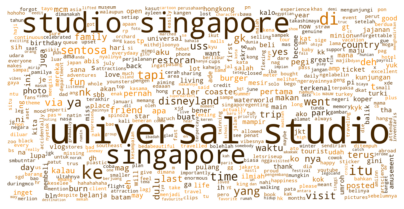

In [38]:
import wordcloud as wc

cloud = wc.WordCloud(stopwords=STOPWORDS,color_func=wc.get_single_color_func('darkorange'),
                    background_color='white',max_words=2000,random_state=42,
                    width=2000, height=1000,contour_color='black',contour_width=2).generate(all_facebook)
plt.figure(figsize=[7,7])

plt.imshow(cloud,interpolation='bilinear')
plt.axis("off");

In [ ]:
def wordcloud(STOPWORDS, cleaned_text, save_location):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=2000, height=1000).generate(cleaned_text)

    # Display the generated image:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(save_location)

In [15]:
weather.loc[weather['station_name'] == 'Alexandra Road']

,station_id,station_name,latitude,longitude,timestamp,readings,types of rainfall
0,S77,Alexandra Road,1.2937,103.8125,2017-01-01 00:04:59+08:00,0.0,No rain
55,S77,Alexandra Road,1.2937,103.8125,2017-01-01 00:09:59+08:00,0.0,No rain
110,S77,Alexandra Road,1.2937,103.8125,2017-01-01 00:14:59+08:00,0.0,No rain
165,S77,Alexandra Road,1.2937,103.8125,2017-01-01 00:19:59+08:00,0.0,No rain
220,S77,Alexandra Road,1.2937,103.8125,2017-01-01 00:24:59+08:00,0.0,No rain
...,...,...,...,...,...,...,...
111828,S77,Alexandra Road,1.2937,103.8125,2017-01-07 23:39:59+08:00,0.0,No rain
111885,S77,Alexandra Road,1.2937,103.8125,2017-01-07 23:44:59+08:00,0.0,No rain
111942,S77,Alexandra Road,1.2937,103.8125,2017-01-07 23:49:59+08:00,0.0,No rain
111999,S77,Alexandra Road,1.2937,103.8125,2017-01-07 23:54:59+08:00,0.0,No rain


In [4]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv
# Creating list to append tweet data to
tweets_list = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('universal studio OR USS OR universal studio singapore since:2017-01-01').get_items()):
    if i>100:
        break
    tweets_list.append([tweet.url, tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above

filename = 'universal studio'
tweets_df = pd.DataFrame(tweets_list, columns=['URL', 'Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df.to_csv('universal studio.csv')